In [2]:
%matplotlib inline
import cv2
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
from IPython import display
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os
import tempfile

In [3]:
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [4]:
#from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = './drive/MyDrive/CS_412/Project/'

In [6]:
heart_disease = pd.read_csv(path + "heart_2020_cleaned.csv")

In [7]:
heart_disease.shape

(319795, 18)

In [8]:
heart_disease.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [9]:
heart_disease.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
heart_disease.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [11]:
numOfPositive = heart_disease['HeartDisease'].value_counts()['Yes']
numOfNegative = heart_disease['HeartDisease'].value_counts()['No']
print("Number of people with heart disease {}".format(numOfPositive))
print("Number of people whom don't have heart disease {}".format(numOfNegative))

Number of people with heart disease 27373
Number of people whom don't have heart disease 292422


In [12]:
perc = (numOfPositive/(numOfPositive+numOfNegative))*100
print("Percentage of people with heart disease: %.2f%%" % perc)

Percentage of people with heart disease: 8.56%


In [13]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(heart_disease)
categorical_columns

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [14]:
data_categorical = heart_disease[categorical_columns]
data_categorical.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [15]:
HeartDisease_column = data_categorical[['HeartDisease']]

encoder = OrdinalEncoder()
heartdisease_encoded = encoder.fit_transform(HeartDisease_column)
heartdisease_encoded[:,0:10]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [16]:
encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [17]:
encoder = OrdinalEncoder(categories=[['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'],
                                     ['No', 'Yes'], ['Female', 'Male'], 
                                     ['18-24', '25-29','30-34', '35-39', '40-44', '45-49', '50-54',
                                      '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
                                     ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
                                      'White', 'Other'],
                                     ['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'],
                                     ['No', 'Yes'],
                                     ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
                                     ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']])

data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  7.,  4.,  3.,  1.,  3.,  1.,  0.,
         1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., 12.,  4.,  0.,  1.,  3.,  0.,  0.,
         0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  9.,  4.,  3.,  1.,  1.,  1.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,  2.,  0.,  0.,
         1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  4.,  4.,  0.,  1.,  3.,  0.,  0.,
         0.]])

In [18]:
encoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
        '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
       dtype=object),
 array(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
        'White', 'Other'], dtype=object),
 array(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [19]:
for idx, col in enumerate(categorical_columns):
  heart_disease[col] = pd.Series(data_encoded[:, idx])

In [20]:
heart_disease.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,4.0,3.0,1.0,3.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,4.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,4.0,3.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,4.0,0.0,1.0,3.0,8.0,0.0,0.0,0.0
5,1.0,28.87,1.0,0.0,0.0,6.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0
6,0.0,21.63,0.0,0.0,0.0,15.0,0.0,0.0,0.0,10.0,4.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0
7,0.0,31.64,1.0,0.0,0.0,5.0,0.0,1.0,0.0,12.0,4.0,3.0,0.0,2.0,9.0,1.0,0.0,0.0
8,0.0,26.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,2.0,0.0,1.0,5.0,0.0,1.0,0.0
9,0.0,40.69,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,4.0,0.0,1.0,2.0,10.0,0.0,0.0,0.0


In [21]:
yData = heart_disease['HeartDisease'].to_numpy()
xData = heart_disease.drop(columns=['HeartDisease'])

In [22]:
xTrain, xTest , yTrain, yTest = train_test_split(xData, yData, test_size = 0.20)

In [23]:
treeModel = tree.DecisionTreeClassifier()
treeModel.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [24]:
text_representation = tree.export_text(treeModel)
print(text_representation)

|--- feature_12 <= 1.50
|   |--- feature_8 <= 6.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_8 <= 3.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- feature_13 <= 4.50
|   |   |   |   |   |   |--- feature_0 <= 18.69
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_0 >  18.69
|   |   |   |   |   |   |   |--- feature_0 <= 24.36
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 28.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  28.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- feature_13 >  3.50
|   |   |   |   |   |   |   | 

Training accuracy: 0.9968573617473694
Testing accuracy: 0.8646007598617864


              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     58458
         1.0       0.23      0.25      0.24      5501

    accuracy                           0.86     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.86      0.87     63959



Text(113.9222222222222, 0.5, 'Actual label')

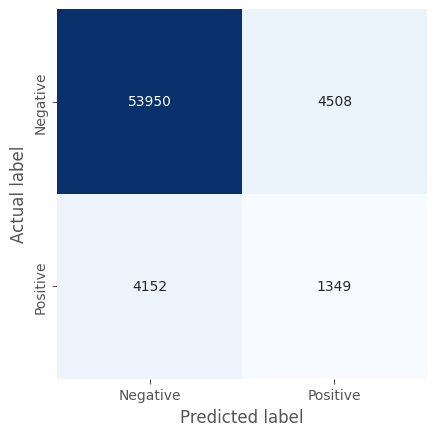

In [25]:
# Predict
y_train_predict = treeModel.predict(xTrain)
y_test_predict = treeModel.predict(xTest)

#Display the outcome of classification
print("Training accuracy: " + str(metrics.accuracy_score(yTrain, y_train_predict)))
print("Testing accuracy: " + str(metrics.accuracy_score(yTest, y_test_predict)))
print("\n")
print(metrics.classification_report(yTest, y_test_predict))

mat = metrics.confusion_matrix(yTest, y_test_predict)
labels = ['Negative', 'Positive']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [26]:
# define model
treeModel = DecisionTreeClassifier()
# define evaluation procedure
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(treeModel, xData, yData, scoring='roc_auc', cv=rskf, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % statistics.mean(scores))

Mean ROC AUC: 0.589


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     58458
         1.0       0.52      0.09      0.15      5501

    accuracy                           0.91     63959
   macro avg       0.72      0.54      0.55     63959
weighted avg       0.89      0.91      0.89     63959



Text(113.9222222222222, 0.5, 'Actual label')

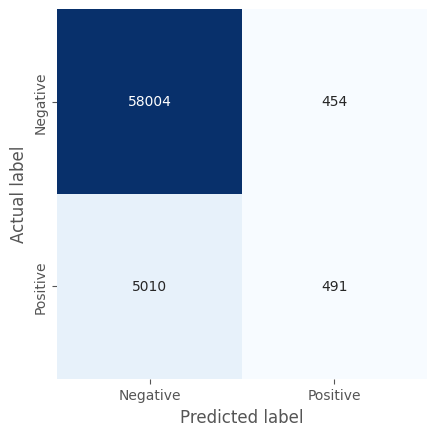

In [27]:
XGBModel = xgb.XGBClassifier()

# Fit
XGBModel.fit(xTrain, yTrain)

# Predict
y_predict = XGBModel.predict(xTest)

print(metrics.classification_report(yTest, y_predict))

mat = metrics.confusion_matrix(yTest, y_predict)
labels = ['Negative', 'Positive']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [28]:
'''#Takes too long to execute
#infeasible for data size

# clf is a non-linear svm classifier
clf = svm.SVC(kernel = 'rbf')

# Fit data
clf.fit(xTrain, yTrain)

# Predict
y_train_predict = clf.predict(xTrain)
y_test_predict = clf.predict(xTest)

#Display the outcome of classification
print("Training accuracy: " + str(metrics.accuracy_score(yTrain, y_train_predict)))
print("Testing accuracy: " + str(metrics.accuracy_score(yTest, y_test_predict)))
print("\n")
print(metrics.classification_report(yTest, y_test_predict))
print(metrics.confusion_matrix(yTest, y_test_predict))'''

'#Takes too long to execute\n#infeasible for data size\n\n# clf is a non-linear svm classifier\nclf = svm.SVC(kernel = \'rbf\')\n\n# Fit data\nclf.fit(xTrain, yTrain)\n\n# Predict\ny_train_predict = clf.predict(xTrain)\ny_test_predict = clf.predict(xTest)\n\n#Display the outcome of classification\nprint("Training accuracy: " + str(metrics.accuracy_score(yTrain, y_train_predict)))\nprint("Testing accuracy: " + str(metrics.accuracy_score(yTest, y_test_predict)))\nprint("\n")\nprint(metrics.classification_report(yTest, y_test_predict))\nprint(metrics.confusion_matrix(yTest, y_test_predict))'

In [29]:
LRModel = LinearRegression(fit_intercept=True)
LRModel.fit(xTrain, yTrain)

LinearRegression()

In [30]:
# Predict
y_train_predict = LRModel.predict(xTrain)
y_test_predict = LRModel.predict(xTest)

# Print Coefficients
print("Coefficients: \n")
for i in range(len(LRModel.coef_)):
  print(xData.columns[i], " ", LRModel.coef_[i])

# Print Intercept
print("Intercept: ", LRModel.intercept_)

# Print R-squared
print('\n')
print('R-squared for training: %.2f' % r2_score(yTrain, y_train_predict))
print('R-squared for testing: %.2f' % r2_score(yTest, y_test_predict))

# Print mean squared error
print('mean squared error for training: %.2f'% mean_squared_error(yTrain, y_train_predict))
print('mean squared error for testing: %.2f'% mean_squared_error(yTest, y_test_predict))

Coefficients: 

BMI   -0.0006678976402811993
Smoking   0.020776529239715447
AlcoholDrinking   -0.016162105317268104
Stroke   0.18405999001397988
PhysicalHealth   0.0011761050595618923
MentalHealth   3.328464472093383e-05
DiffWalking   0.042242152343865226
Sex   0.04947538472448728
AgeCategory   0.01134340727394318
Race   0.004744077516366416
Diabetic   0.019979766601048683
PhysicalActivity   -0.0028830719161413313
GenHealth   -0.03211014936797782
SleepTime   0.0007048805814640592
Asthma   0.015503655231923732
KidneyDisease   0.09859954823935545
SkinCancer   0.02463162001000468
Intercept:  0.02902346415793338


R-squared for training: 0.14
R-squared for testing: 0.14
mean squared error for training: 0.07
mean squared error for testing: 0.07


In [31]:
selector = RFECV(estimator = LinearRegression(fit_intercept=True), step=1, cv=5, scoring='neg_mean_squared_error')
selector = selector.fit(xData, yData)
f = selector.get_support(True) #the most important features
best_features = [xData.columns[x] for x in f]
print(best_features)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [32]:
print(f)

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16]


In [33]:
best_xData = xData[best_features]

best_xTrain, best_xTest , best_yTrain, best_yTest = train_test_split(best_xData, yData, test_size = 0.20)

# Build model
best_LRModel = LinearRegression(fit_intercept=True)
best_LRModel.fit(best_xTrain, best_yTrain)

# Predict
y_train_predict = best_LRModel.predict(best_xTrain)
y_test_predict = best_LRModel.predict(best_xTest)

# Print Coefficients
print("Coefficients: \n")
for i in range(len(best_LRModel.coef_)):
  print(best_xData.columns[i], " ", best_LRModel.coef_[i])

# Print Intercept
print("Intercept: ", best_LRModel.intercept_)

# Print R-squared
print('\n')
print('R-squared for training: %.2f' % r2_score(best_yTrain, y_train_predict))
print('R-squared for testing: %.2f' % r2_score(best_yTest, y_test_predict))

# Print mean squared error
print('mean squared error for training: %.2f'% mean_squared_error(best_yTrain, y_train_predict))
print('mean squared error for testing: %.2f'% mean_squared_error(best_yTest, y_test_predict))

Coefficients: 

BMI   -0.000670469833256522
Smoking   0.02005229233877109
AlcoholDrinking   -0.015388626823231808
Stroke   0.1828614040654375
PhysicalHealth   0.001210835944128616
DiffWalking   0.04470163193492481
Sex   0.04882522272716435
AgeCategory   0.011444968309462374
Race   0.004478487514411508
Diabetic   0.01996300377147947
PhysicalActivity   -0.001124550000376714
GenHealth   -0.03233118138175391
SleepTime   0.0005208109580701306
Asthma   0.016807632551151423
KidneyDisease   0.10268326175029183
SkinCancer   0.02561077714394744
Intercept:  0.03061204908857721


R-squared for training: 0.14
R-squared for testing: 0.14
mean squared error for training: 0.07
mean squared error for testing: 0.07


In [34]:
logModel = LogisticRegression() 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []

for train_index, test_index in skf.split(xData, yData): 
    X_train_fold, X_test_fold = xData.iloc[train_index], xData.iloc[test_index] 
    y_train_fold, y_test_fold = yData[train_index], yData[test_index]
    logModel.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(logModel.score(X_test_fold, y_test_fold))

print('Maximum Accuracy',max(lst_accu_stratified)) 
print('Minimum Accuracy:',min(lst_accu_stratified)) 
print('Overall Accuracy:',statistics.mean(lst_accu_stratified))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Maximum Accuracy 0.9167917448405253
Minimum Accuracy: 0.9145090681676048
Overall Accuracy: 0.9155115003648912


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
NNModel = tf.keras.Sequential()
NNModel.add(layers.Dense(512, activation='relu', input_dim=17))
NNModel.add(layers.Dense(512, activation='relu'))
NNModel.add(layers.Dense(1, activation='sigmoid'))
NNModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
NNModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9216      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 272,385
Trainable params: 272,385
Non-trainable params: 0
_________________________________________________________________


In [36]:
hist = NNModel.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=100)


Epoch 1/10
2559/2559 [==============================] - 32s 12ms/step - loss: 0.2377 - accuracy: 0.9145 - val_loss: 0.2344 - val_accuracy: 0.9143
Epoch 2/10
2559/2559 [==============================] - 31s 12ms/step - loss: 0.2299 - accuracy: 0.9160 - val_loss: 0.2311 - val_accuracy: 0.9145
Epoch 3/10
2559/2559 [==============================] - 29s 11ms/step - loss: 0.2287 - accuracy: 0.9157 - val_loss: 0.2288 - val_accuracy: 0.9152
Epoch 4/10
2559/2559 [==============================] - 27s 10ms/step - loss: 0.2278 - accuracy: 0.9156 - val_loss: 0.2283 - val_accuracy: 0.9155
Epoch 5/10
2559/2559 [==============================] - 30s 12ms/step - loss: 0.2269 - accuracy: 0.9159 - val_loss: 0.2285 - val_accuracy: 0.9149
Epoch 6/10
2559/2559 [==============================] - 27s 11ms/step - loss: 0.2267 - accuracy: 0.9161 - val_loss: 0.2277 - val_accuracy: 0.9155
Epoch 7/10
2559/2559 [==============================] - 29s 11ms/step - loss: 0.2264 - accuracy: 0.9158 - val_loss: 0.2298 -

[]

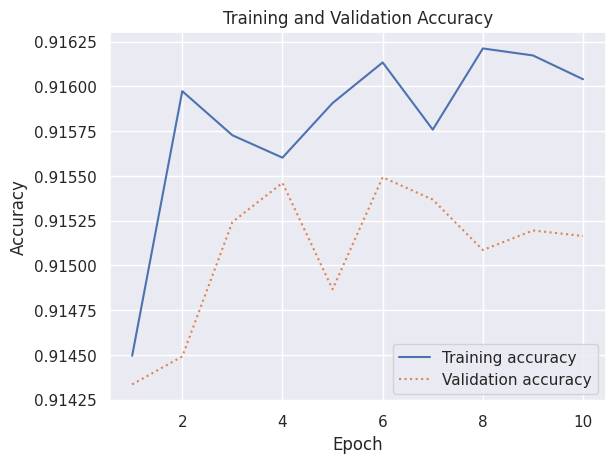

In [37]:
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1999/1999 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     58458
         1.0       0.20      0.83      0.32      5501

    accuracy                           0.70     63959
   macro avg       0.59      0.76      0.57     63959
weighted avg       0.91      0.70      0.77     63959



Text(109.44999999999997, 0.5, 'Actual label')

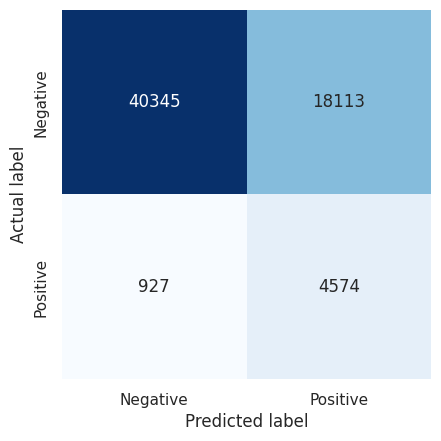

In [38]:
y_predict = NNModel.predict(xTest) > perc/100 # 0.0856              #0.5
mat = metrics.confusion_matrix(yTest, y_predict)
labels = ['Negative', 'Positive']
 
print(metrics.classification_report(yTest, y_predict))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [39]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(xData, yData, test_size=0.2)
xTrain2, xVal, yTrain2, yVal = train_test_split(xTrain2, yTrain2, test_size=0.2)

In [40]:
scaler = StandardScaler()
xTrain2 = scaler.fit_transform(xTrain2)

xVal = scaler.transform(xVal)
xTest2 = scaler.transform(xTest2)

In [41]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

'''NNModel2 = tf.keras.Sequential()
NNModel2.add(layers.Dense(512, activation='relu', input_dim=17))
NNModel2.add(layers.Dense(512, activation='relu'))
NNModel2.add(layers.Dense(1, activation='sigmoid'))
NNModel2.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
NNModel2.summary()'''

'''layers.Dense(
            16, activation='relu',
            input_shape=(xData.shape[-1],)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid',
                          bias_initializer=output_bias),'''

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential(
      [
        layers.Dense(512, activation='relu', input_shape=(xData.shape[-1],)),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)
      ]
  )

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

NNModel2 = make_model(output_bias=perc/100)
NNModel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               9216      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 272,385
Trainable params: 272,385
Non-trainable params: 0
_________________________________________________________________


In [42]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
NNModel2.save_weights(initial_weights)

In [43]:
NNModel2.load_weights(initial_weights)
hist = NNModel2.fit(
    xTrain2,
    yTrain2,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(xVal, yVal))

Epoch 1/100
100/100 [==============================] - 13s 112ms/step - loss: 0.2514 - tp: 1142.0000 - fp: 2665.0000 - tn: 184555.0000 - fn: 16306.0000 - accuracy: 0.9073 - precision: 0.3000 - recall: 0.0655 - auc: 0.7920 - prc: 0.2449 - val_loss: 0.2278 - val_tp: 415.0000 - val_fp: 346.0000 - val_tn: 46406.0000 - val_fn: 4001.0000 - val_accuracy: 0.9150 - val_precision: 0.5453 - val_recall: 0.0940 - val_auc: 0.8406 - val_prc: 0.3474
Epoch 2/100
100/100 [==============================] - 9s 90ms/step - loss: 0.2253 - tp: 1377.0000 - fp: 1028.0000 - tn: 186192.0000 - fn: 16071.0000 - accuracy: 0.9165 - precision: 0.5726 - recall: 0.0789 - auc: 0.8418 - prc: 0.3482 - val_loss: 0.2271 - val_tp: 325.0000 - val_fp: 229.0000 - val_tn: 46523.0000 - val_fn: 4091.0000 - val_accuracy: 0.9156 - val_precision: 0.5866 - val_recall: 0.0736 - val_auc: 0.8418 - val_prc: 0.3518
Epoch 3/100
100/100 [==============================] - 10s 103ms/step - loss: 0.2241 - tp: 1459.0000 - fp: 1084.0000 - tn: 186

In [44]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

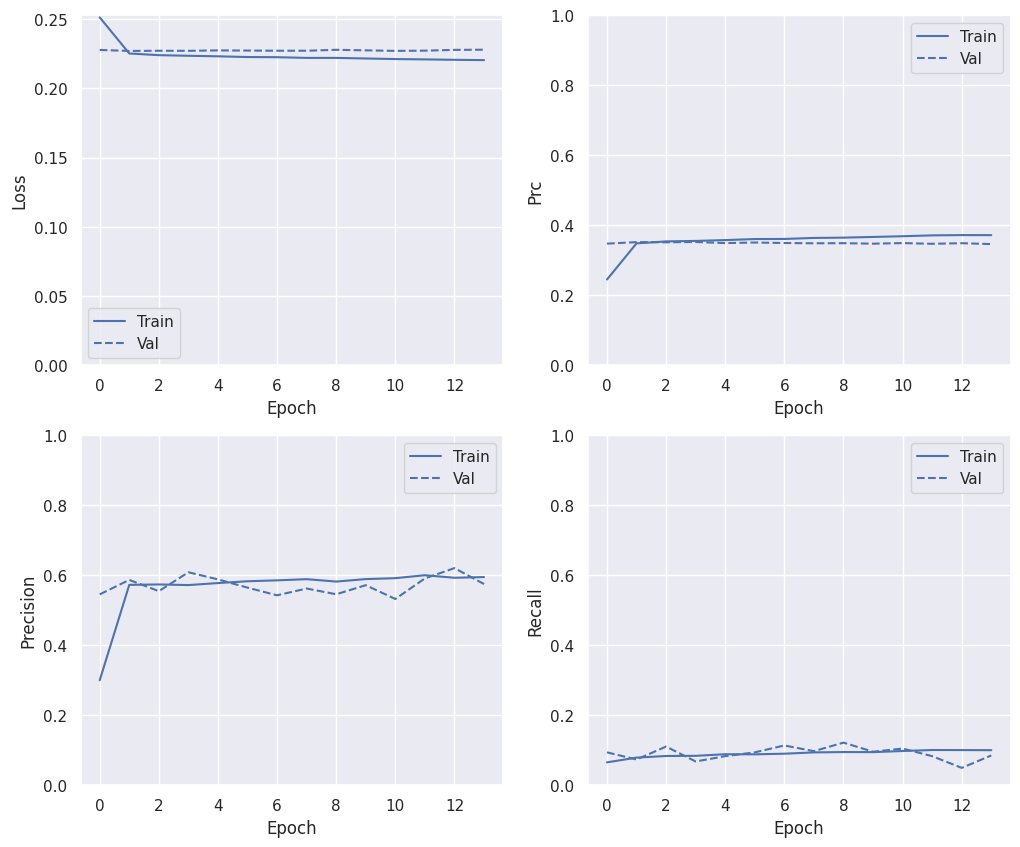

In [45]:
plot_metrics(hist)

In [46]:
#hist = NNModel2.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=100)

[]

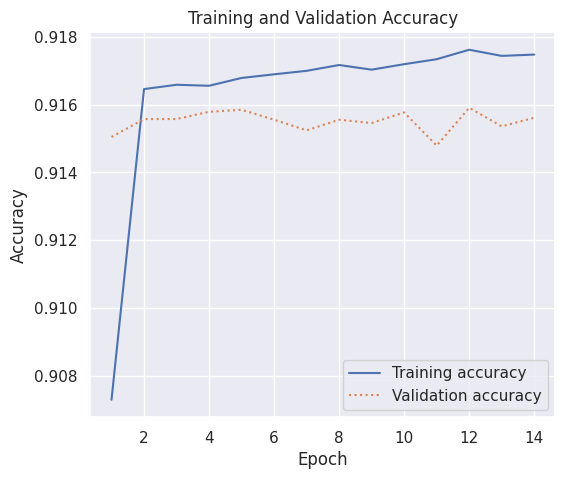

In [47]:
sns.set()
mpl.rcParams['figure.figsize'] = (6, 5)
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1999/1999 [==============================] - 5s 3ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58450
         1.0       0.22      0.78      0.34      5509

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959



Text(81.24999999999999, 0.5, 'Actual label')

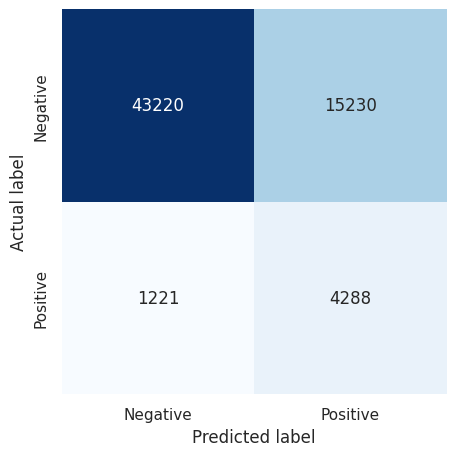

In [48]:
y_predict = NNModel2.predict(xTest2) > perc/100
mat = metrics.confusion_matrix(yTest2, y_predict)
labels = ['Negative', 'Positive']
 
print(metrics.classification_report(yTest2, y_predict))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [49]:
train_predictions_baseline = NNModel2.predict(xTrain2, batch_size=BATCH_SIZE)
test_predictions_baseline = NNModel2.predict(xTest2, batch_size=BATCH_SIZE)

32/32 [==============================] - 1s 23ms/step


In [50]:
def plot_cm(labels, predictions, p=0.5):
  cm = metrics.confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Healthy Patient identified (True Negatives): ', cm[0][0])
  print('Healthy Patient Incorrectly Diagnosed (False Positives): ', cm[0][1])
  print('Heart Disease Missed (False Negatives): ', cm[1][0])
  print('Heart Disease Detected (True Positives): ', cm[1][1])
  print('Total Patients: ', np.sum(cm[1]))

loss :  0.22946546971797943
tp :  348.0
fp :  273.0
tn :  58177.0
fn :  5161.0
accuracy :  0.9150393009185791
precision :  0.5603864789009094
recall :  0.06316936016082764
auc :  0.8370810747146606
prc :  0.3343725800514221

Healthy Patient identified (True Negatives):  43220
Healthy Patient Incorrectly Diagnosed (False Positives):  15230
Heart Disease Missed (False Negatives):  1221
Heart Disease Detected (True Positives):  4288
Total Patients:  5509


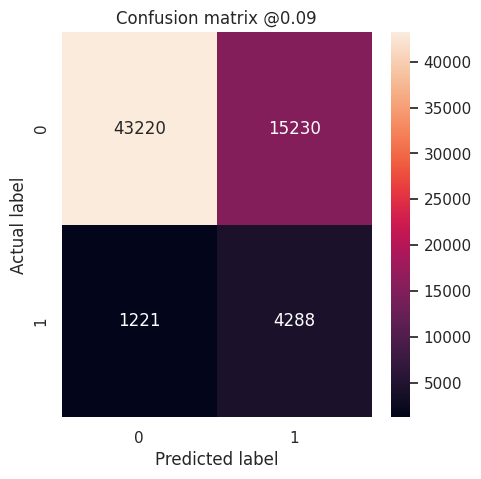

In [51]:
results = NNModel2.evaluate(xTest2, yTest2,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(NNModel2.metrics_names, results):
  print(name, ': ', value)
print()

plot_cm(yTest2, test_predictions_baseline, perc/100)

Training accuracy: 0.9232516143154208
Testing accuracy: 0.9065026032301944


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     58458
         1.0       0.34      0.09      0.14      5501

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.55     63959
weighted avg       0.87      0.91      0.88     63959

Healthy Patient identified (True Negatives):  57107
Healthy Patient Incorrectly Diagnosed (False Positives):  1343
Heart Disease Missed (False Negatives):  5361
Heart Disease Detected (True Positives):  148
Total Patients:  5509


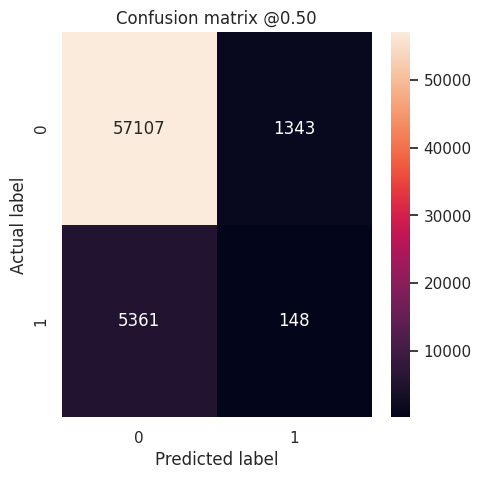

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors=5)

# Fit data
KNNModel.fit(xTrain, yTrain)

# Predict
y_train_predict = KNNModel.predict(xTrain)
y_test_predict = KNNModel.predict(xTest)


#Display the outcome of classification
print("Training accuracy: " + str(metrics.accuracy_score(yTrain, y_train_predict)))
print("Testing accuracy: " + str(metrics.accuracy_score(yTest, y_test_predict)))
print("\n")
print(metrics.classification_report(yTest, y_test_predict))
plot_cm(yTest2, y_test_predict)

## References



*   https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
*   https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
*   https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html
*   https://stackoverflow.com/questions/72170947/how-to-use-ordinalencoder-to-set-custom-order
*   https://www.projectpro.io/recipes/explain-stratified-k-fold-cross-validation
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
*   https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/
*   https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97
*   https://www.atmosera.com/blog/binary-classification-with-neural-networks/
*   https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390
*   https://www.tensorflow.org/tutorials/structured_data/imbalanced_data











https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm

https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death

https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.